<a href="https://colab.research.google.com/github/jadhav-prathamesh/Project/blob/main/Car_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



In [3]:
data = pd.read_csv("/content/car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [10]:
print(data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [11]:
print(data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


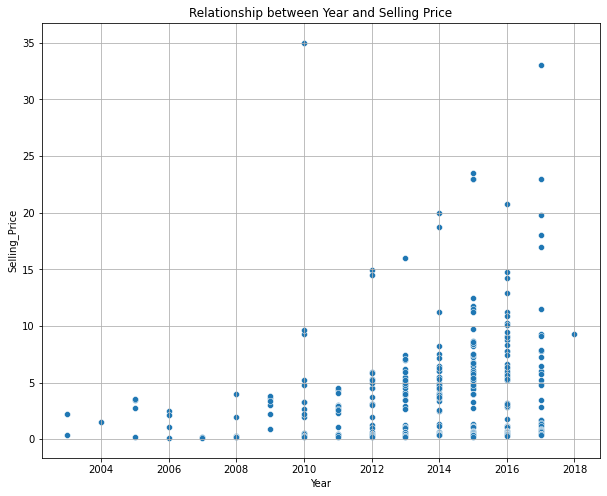

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data["Year"],data["Selling_Price"])
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.title("Relationship between Year and Selling Price")
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


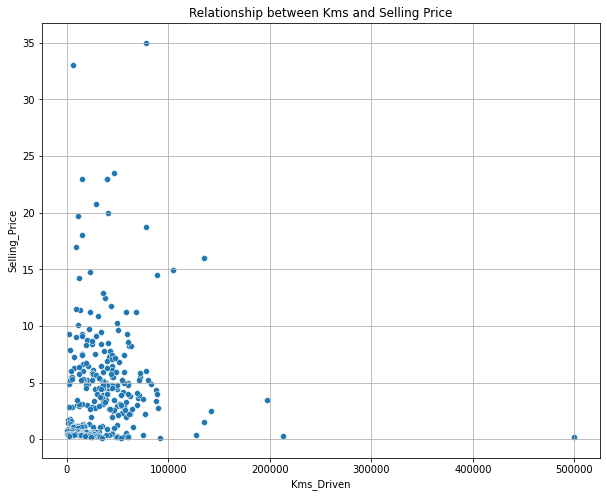

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data["Kms_Driven"],data["Selling_Price"])
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.title("Relationship between Kms and Selling Price")
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


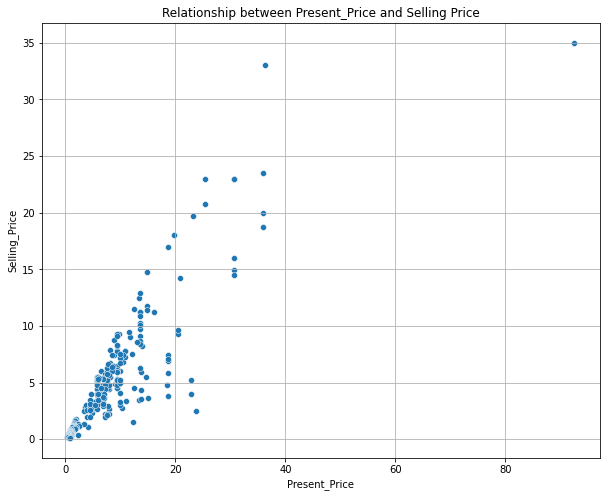

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data["Present_Price"],data["Selling_Price"])
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Relationship between Present_Price and Selling Price")
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


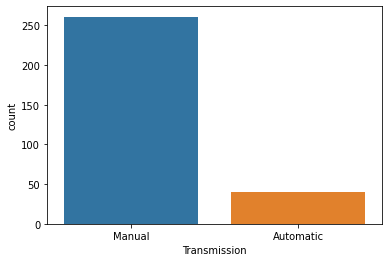

In [25]:
sns.countplot(data.Transmission)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


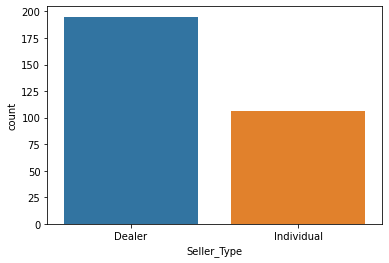

In [27]:
sns.countplot(data.Seller_Type)

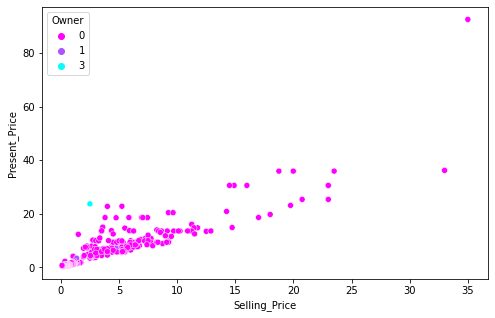

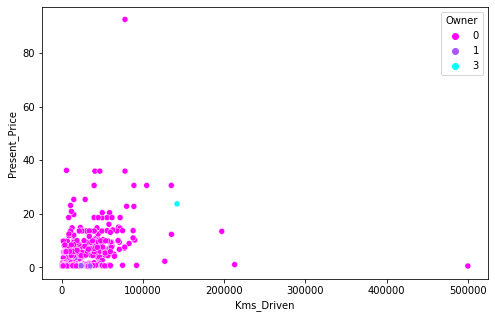

In [29]:
for i in ['Selling_Price', 'Kms_Driven']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=data, x=i, y='Present_Price', hue='Owner', palette='cool_r')

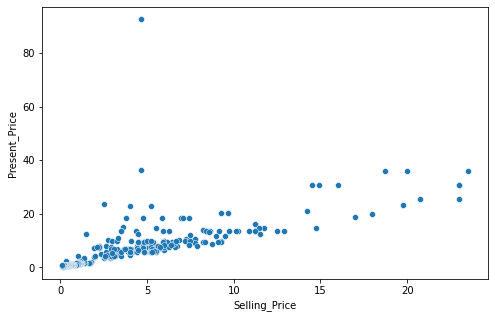

In [30]:
def sel_price(s):
    if s > 30:
        return data['Selling_Price'].mean()
    else:
        return s
data['Selling_Price'] = data['Selling_Price'].apply(sel_price)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=data)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()

In [35]:
data.Seller_Type = encoder.fit_transform(data.Seller_Type)
data.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [37]:
data.Fuel_Type = encoder.fit_transform(data.Fuel_Type)
data.Fuel_Type.value_counts()

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64

In [38]:
data.Transmission = encoder.fit_transform(data.Transmission)
data.Transmission.value_counts()

1    261
0     40
Name: Transmission, dtype: int64

In [39]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [40]:
x = data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=132)

In [43]:
print(x_train.shape)
print(y_train.shape)

(240, 7)
(240,)


In [44]:
print(x_test.shape)
print(y_test.shape)

(61, 7)
(61,)


In [47]:
model = LinearRegression()
model.fit(x_train,y_train)
Lrpred = model.predict(x_test)


In [49]:
from sklearn.metrics import r2_score
error= metrics.r2_score(y_test, Lrpred)
print("R squared Error : ", error)

R squared Error :  0.800196673991175


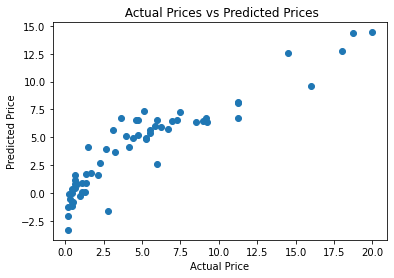

In [50]:
plt.scatter(y_test, Lrpred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [51]:
lassomodel = Lasso()

lassomodel.fit(x_train,y_train)

lassopred = lassomodel.predict(x_test)

In [52]:
error= metrics.r2_score(y_test, lassopred)
print("R squared Error : ", error)

R squared Error :  0.5670026481916686


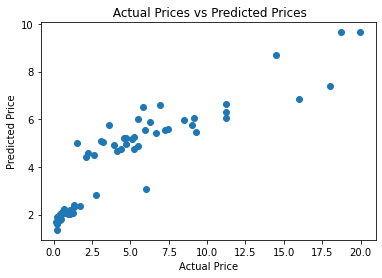

In [53]:
plt.scatter(y_test, lassopred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()

RFmodel.fit(x_train,y_train)

RFpred = RFmodel.predict(x_test)



In [55]:
error= metrics.r2_score(y_test, RFpred)
print("R squared Error : ", error)

R squared Error :  0.95698836933395


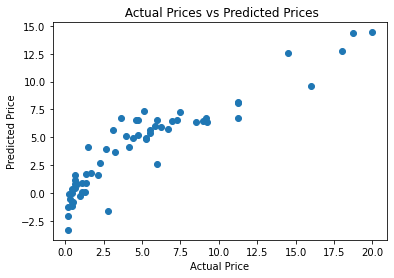

In [57]:
plt.scatter(y_test, Lrpred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [58]:
user = (2016,10.79,43000,1,0,1,0)
asarray = np.asarray(user)
reshaped =asarray.reshape(1,-1)
processed = scale.transform(reshaped)

prediction = RFmodel.predict(processed)

print("Predicted Selling Price: ",prediction[0])

Predicted Selling Price:  7.896


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
